# Part B - Programming Project and Report 

    # ASSIGNMENT 2
            
     Amaya Ruth Syed - student no. 190805496

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import functools
import operator
from statistics import stdev
import pandas as pd
from sklearn.linear_model import LinearRegression

We will address the problem of how many distinct self avoiding walks (SAWs) of length $n$ are present on a 2D infinite square lattice. An n-steps SAW on a square lattice is a sequence of movements in four possible directions (up, down, left, right), which cannot visit the same position twice. The original motivation for this problem is solving the spacial configuration of polymers, if one considers the simple fact that two atoms cannot occupy the same space [1]. By restricting ourselves to a square lattice, we simplify the problem to considering the configuration of linear polymers [2]

There is currently no known formula to give a precise answer to this question and up to date the highest number computed has been for SAWs up to $n = 79$ [3]. Moreover, the algorithms that have been developed to address this question have an exponential computing time, rendering the computation of larger numbers very difficult. Several methods have been devised to estimate these numbers, however their computational time is also exponential, albeit with a smaller base. Therefore, the aim of these algorithms has generally been to minimize the base of the exponential function describing the running time. The current best running time for counting self-avoiding walks in a square lattice is $\lambda \approx 1.3$ [3]. \\

In this report, we will implement an exact recursive solution up to n= 10, as well as two sampling methods: simple sampling and Rosenbluth [4] and compare our results with the tabulated exact values up to n = 79. The algorithms we implement are only a first approximation to the problem, but give us material to reflect on the difficulties inherent to the problem. 

# Recursive method for finding exact solutions

First we store the known (n = 79) exact number of self avoiding walks (SAWs) on a 2D lattice [5]. We will use this for comparison of our estimated results later on.

In [2]:
# Exact sequence of SAWs of length n, up to 79. We add a sequence of zeros to round up the length of the list to 100, so as to simplify some calculations later.

exact = [4,12,36,100,284,780,2172,5916,16268,44100,120292,324932,881500,2374444,6416596,17245332,46466676,124658732,335116620,897697164,2408806028,6444560484,17266613812,46146397316,123481354908,329712786220,881317491628,2351378582244,6279396229332,16741957935348,44673816630956,119034997913020,317406598267076,845279074648708,2252534077759844,5995740499124412,15968852281708724,42486750758210044,113101676587853932,300798249248474268,800381032599158340,2127870238872271828,5659667057165209612,15041631638016155884,39992704986620915140,106255762193816523332,282417882500511560972,750139547395987948108,1993185460468062845836,5292794668724837206644,14059415980606050644844,37325046962536847970116,99121668912462180162908,263090298246050489804708,698501700277581954674604,1853589151789474253830500,4920146075313000860596140,13053884641516572778155044,34642792634590824499672196,91895836025056214634047716,243828023293849420839513468,646684752476890688940276172,1715538780705298093042635884,4549252727304405545665901684,12066271136346725726547810652,31992427160420423715150496804,84841788997462209800131419244,224916973773967421352838735684,596373847126147985434982575724,1580784678250571882017480243636,4190893020903935054619120005916,11107224538074654820152678182884,29442884996760677051402398150644,78023796077779727644807609460228,206797849568186990141402577046860,547952781764285893561169365957068,1452142167241575828091155500636684,3847327231644550282490410907667972,10194710293557466193787900071923676, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

a) We now implement our recursive algorithm which finds the exact number of self avoiding paths on a 2D lattice. We define the algorithms in two parts, one which initializes the global variables, such as the total number of walks counted, as well the grid coordinates the sequence will move through (rec_count_SAW) and calls the actual recursive algorithm (recursive_SAW). In the recursive_SAW each position on the grid will be assigned the output value 1 if it has been visited and output value 0 if it hasn't [3]. The algorithm searches the whole branch, up to $n$ if possible, in one direction then the other, successively, until completing it's search in all directions. Each time it completes a walk, we add a  1 to the global Total count. If it becomes trapped, it searches in another direction.

Because of the thorough but inefficient nature of the algorithm, we only compute the first 15 values and check them against out exact list.

In [3]:
def recursive_SAW(x, y, j):
    
    global Total
    
    if j == 0:
         Total += 1
    else:
        if grid[x+1, y] == 0 : # we search for walks going up
            grid[x+1, y] = 1   # this position is now 1 on the grid
            recursive_SAW(x+1, y, j-1) # if we finish a saw(n), then j = 0 and we add the saw to the Total

        if grid[x-1, y] == 0 : # we search for walks going down
            grid[x-1, y] = 1
            recursive_SAW(x-1, y, j-1)

        if grid[x, y+1] == 0 : # we search for walks going right
            grid[x, y+1] = 1
            recursive_SAW(x, y+1, j-1)

        if grid[x, y-1] == 0 : # we search for walks going left
            grid[x, y-1] = 1   # if 
            recursive_SAW(x, y-1, j-1)

    grid[x, y] = 0

    return Total


def rec_count_SAW(N):
    
    global grid, Total # we initialize our global varibales. 
    grid = np.zeros((2*N+1,2*N+1)) # we define the grid configuration
    grid[N,N] = 1 # we initialize our origine in (n, n) to avoid negative grid values. 
    Total = 0
    return recursive_SAW(N, N, N)


In [4]:
start = timeit.default_timer()
print('First 15 recursive SAW #:',[rec_count_SAW(i) for i in range(1,15)],'. First 15 of exact SAWs #:', exact[:14])  
stop = timeit.default_timer()
print('Time [s]: ', stop - start)

First 15 recursive SAW #: [4, 12, 36, 100, 284, 780, 2172, 5916, 16268, 44100, 120292, 324932, 881500, 2374444] . First 15 of exact SAWs #: [4, 12, 36, 100, 284, 780, 2172, 5916, 16268, 44100, 120292, 324932, 881500, 2374444]
Time [s]:  9.490289782999994


We can see from our result that the first 15 numbers of SAWs counted by our recursive algorithm coincide perfectly with the exact values that have been tabulated. Visually, we can immediately see that the number of SAWs of a given length augments very rapidly, with over 2 million possible configurations for walks of length 15. Because these numbers are so large, we can see one of the main problems is the number of total computations involved for larger walks [3]. 

\textbf{Run Time Analysis for the recursive method} 

We define a function to calculate the run time of our recursive algorithm (timing_rec_SAW) from $n=1$, to $n=15$. We apply a log transformation to the run times and plot them vs. the walk lengths. We then perform a linear regression and obtain the intercept and linear coefficient.

In [5]:
def timing_rec_SAW(N_min, N_max):
    times=[]
    for n in range(N_min,N_max+1):
        start = timeit.default_timer()
        rec_count_SAW(n)
        stop = timeit.default_timer()
        times.append(stop-start)
    return times

N_max = 14
N_min = 1
N_min_reg = 3

times = np.array(timing_rec_SAW(N_min,N_max))
log_times = np.log(times)
n_array = (np.arange(N_min,N_max+1)).reshape(-1, 1)
n_array_reg = n_array[N_min_reg:]
log_times_reg = np.log(times)[N_min_reg:]

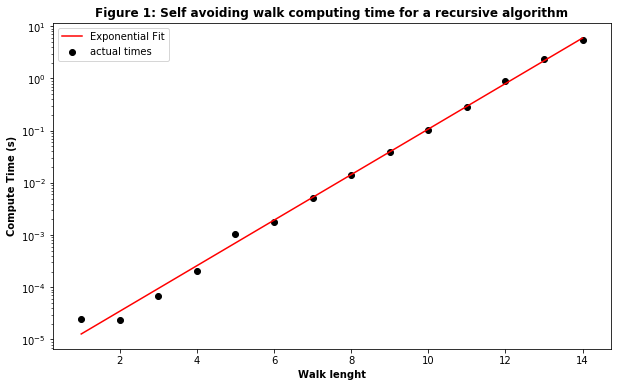

In [6]:
lr = LinearRegression()  # create object for the class
lr.fit(n_array_reg,log_times_reg)  # perform linear regression

plt.figure(figsize=(10,6))
plt.semilogy(n_array ,np.exp(lr.predict(n_array)), color='red')
plt.scatter(n_array ,times, color='black')

plt.xlabel('Walk lenght', fontweight='bold')
plt.ylabel('Compute Time (s)', fontweight='bold')
plt.legend(('Exponential Fit', 'actual times'), loc='upper left')
plt.title('Figure 1: Self avoiding walk computing time for a recursive algorithm', fontweight='bold')
plt.show() 

In [7]:
lr.coef_, lr.intercept_

(array([1.0042634]), -12.274737999003836)

Because the semi-log plot is linear, we know our run time is exponential, which is what we expected. We therefore obtain an exponential computing time of:

\begin{equation*}
 T(n) \simeq 0.000004671 x 2.730^N 
\end{equation*}
 
with $\lambda \approx 2.730$. Using this algorithm for any value beyond beyond $n=20$ is not a practical approach.

# Simple Sampling method for estimating self-avoiding walk numbers.

The first sampling method we will implement is called simple sampling. It is a simple algorithm: at each step the walk has four available directions to go: up, down, right, left, with each options having probability p = 1/4 [2]. The only restriction on the algorithm is that if the directions it randomly chooses out of the four options has already been visited, the whole walk is terminated. The estimator for the total number of n-steps is:

Estimated number of SAWs of a given length = $$4^n \frac{s_n}{S}$$

where $S$ is the total number of iterations, $s_n$ the number of successful completed walks and $n$ is the length of the walk [2]. Because the algorithm is allowed to go back in the direction it comes from and does not check its surroundings, simple sampling is an inefficient algorithm, but is very simple to implement.

We implement the algorithm in simple_sampling_SAW, where wse perform a given number of iterations (max_samples) over a walk of length n (N). A set of coordinates x, y is initialised in visited = (0, 0), which serves as our origin. Each position that is visited is then committed to that set. For each step the algorithm chooses one direction at random (up, down, right, left), each with equal probaility. If the direction has already been visited the algorithm exits the loops and try again. Otherwise it takes a step fowards. We return the number of successful walks, their proportion and their coordinates. 

In [8]:
def simple_sampling_SAW(N, max_samples):
    
    """
        We estimate the proportion of SAW walks on a 2D square lattice via the simple sampling method on a 2D grid looking for SAWs. In each step, the algorithm can choose to go in all four direction (up, down, left, right) with probability 1/4 each. The attrition rate is very high because of the self-reversal probability, hence high N are virtually impossible to achieve [5]. 
    """  
     
    directions = [(1,0), (0,1), (-1,0), (0,-1)] # the four different possible directions: right, up, left, down.
    failure = 0
    s = 0
    occupied = 0
    
    for s in range(max_samples):
        
        x, y = [0], [0] # initializing x, y position vectors in 2D space at origin (0, 0). 
        visited = set([(0,0)])  # visited is a set that stores all positions visited by the walk, starting with the origin (0, 0).
        occupied = 0 # boolean value useful for plotting the walk.
        
        for n in range(N):

            index = np.random.randint(0,len(directions)) # choose a direction at random
            dx, dy = directions[index]
        
            if (x[-1] + dx, y[-1] + dy) in visited:
                
                occupied = 1
                steps = n+1
                failure += 1
                break  # exit this walk
                
            else:    
                
                visited.add((x[-1] + dx, y[-1] + dy))
                x.append(x[-1] + dx)
                y.append(y[-1] + dy)
                steps = n+1
        
    proportion_success = 1 - (failure / max_samples)
    
    return x, y, occupied, steps,  proportion_success, max_samples-failure


In [9]:
# we time a simple run of our algorithm.
start = timeit.default_timer()
simple_sampling_SAW(10, 10000)
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  0.17295663799998806


We plot the coordinates of the simple sampling walks obtain from simple_sampling_SAW in plot_simple_sampling_SAW. If the walk is not successful, it exits and states what step the sequence encountered itself [5]. If one repeats the process several times, it becomes very clear that the main reason the algorithm has a high attrition rate, is because it chooses the direction it comes from with $p = 1/4$. It is therefore highly unlikely we would be able to achieve walk length with larger values of $n$. 

In [10]:
def plot_simple_sampling_SAW(N, max_samples):
    
    """
    We plot the walks obtained via simple sampling [5]. 
    """    
    
    result = simple_sampling_SAW(N, max_samples)
    x = result[0]
    y = result[1]
    occupied = result[2]
    steps = result[3]
    plt.figure(figsize = (3, 3))
    plt.plot(x, y, 'bo-', linewidth = 1)
    plt.plot(0, 0, 'bo', ms = 9, label = 'Start')
    plt.plot(x[-1], y[-1], 'ro', ms = 9, label = 'End')
    plt.axis('equal')
    #plt.grid(True, which='both')
    
    if occupied:
        plt.title('Walk exits at step ' + str(steps), fontsize=14, fontweight='bold', y = 1.05)
    else:
        plt.title('SAW of length ' + str(N), fontsize=14, fontweight='bold', y = 1.05)
    plt.show()

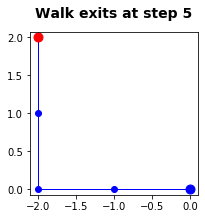

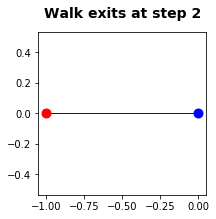

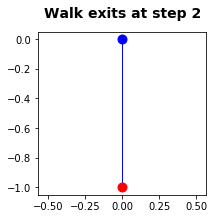

(None, None, None)

In [11]:
# we plot three successive examples of simple sampling
plot_simple_sampling_SAW(10, 1), plot_simple_sampling_SAW(10, 1), plot_simple_sampling_SAW(10, 1)

We now wish to obtain the estimated total number of walks of a given length n based on the results we have obtained for simple sampling, as given by equation (1). Firstly, we will define a function which produces a table where one can see the exact value for a given n, the mean estimated value obtained from simple sampling, with its standard error, relative standard error and the percentage of relative error. We also add columns for the number of completed walks, with their standard error and the percentage of successful SAWs. 

In each iteration this function sweeps over each integer value between the chosen minimum walk length (min_N) and the maximum path length (max_N). For each value of $n$, it performs a given number of sub-samples (samples_per_N).  We therefore obtain robust estimates for our standard error.

In [12]:
# For expediency purposes, we define a function which returns zero, which we will call to calculate the percentage of relative error. 
def ZeroDivEr(x , y):
    try:
        return ((abs(x - y) / y) * 100)
    except ZeroDivisionError:
        return 0

In [13]:
def multi_simple_sampling_SAW(min_N, max_N, n_walks, samples_per_N):
    
    total_results = []
    
    # we will keep our results in a text file
    f = open("SimpleSamplingSAW-MaxN"+str(max_N)+"Sampling"+str(samples_per_N)+"Walks"+str(n_walks)+".txt","w+")
    f.write('N\tExact\tMean_SAWs\tstd_err\t%_std_err\t%_Relative error\tMean_Completed\tstd_err\t%_success\n')    
    
    for n in range(min_N, max_N+1):
        
        estimated_SAWs = []
        completed_paths = []
        
        for s in range(samples_per_N):
            
            result = simple_sampling_SAW(n, n_walks)
            proportion_success = result[4] # we extract the proportion of success from the results of the run
            estimated_SAWs.append(proportion_success * 4**n) # we implement equation (1) here
            completed_paths.append(result[5]) # extract the number of completed paths
        
        exact_num = float(exact[n])
        avg_estimated_SAWs = sum(estimated_SAWs)/len(estimated_SAWs) # calculate the mean estimated saws
        err_estimated_SAWs = stdev(estimated_SAWs)/np.sqrt(samples_per_N) # standard error
        per_err_estimateSAWs =  (err_estimated_SAWs / avg_estimated_SAWs ) * 100 # relative standard error
        avg_completed_paths = sum(completed_paths)/len(completed_paths) # mean completed path
        err_completed_paths = stdev(completed_paths)/np.sqrt(samples_per_N) # and its standard error
        relative_error = ZeroDivEr(avg_estimated_SAWs , exact[n]) # relative error
        proportion_success = (avg_completed_paths / n_walks) * 100 # proportion of successfull walks 
        
        total_results.append([n,avg_estimated_SAWs,err_estimated_SAWs,avg_completed_paths,err_completed_paths, relative_error, proportion_success])

        f.write(str(n)+'\t'+str(exact_num)+'\t'+str(avg_estimated_SAWs)+'\t'+str(err_estimated_SAWs)+'\t'+str(per_err_estimateSAWs)+'\t'+str(relative_error)+'\t'+str(avg_completed_paths)+'\t'+str(err_completed_paths)+'\t'+str(proportion_success)+'\n')
    f.close() 
    
    return total_results


In [56]:
# we run the function for n= 50 and we time the run of our algorithm.
start = timeit.default_timer()
#multi_simple_SAW_results = multi_simple_sampling_SAW(1, 50, 10000, 10)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  84.60378884499914


In [30]:
# we load our results from the text fil with pandas. 
multi_simple_SAW = pd.read_csv('SimpleSamplingSAW-MaxN50Sampling10Walks10000.txt', delimiter = "\t")

In [31]:
pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

multi_simple_SAW

,N,Exact,Mean_SAWs,std_err,%_std_err,%_Relative error,Mean_Completed,std_err.1,%_success
0,1,4.000000e+00,4.000000e+00,0.000000e+00,0.000000,0.000000,10000.0,0.000000,100.000
1,2,1.200000e+01,1.201424e+01,2.748965e-02,0.228809,0.118667,7508.9,17.181030,75.089
2,3,3.600000e+01,3.605056e+01,1.171643e-01,0.325000,0.140444,5632.9,18.306920,56.329
3,4,1.000000e+02,9.964288e+01,4.121706e-01,0.413648,0.357120,3892.3,16.100414,38.923
4,5,2.840000e+02,2.851021e+02,1.352111e+00,0.474255,0.388056,2784.2,13.204208,27.842
5,6,7.800000e+02,7.738982e+02,3.855562e+00,0.498200,0.782277,1889.4,9.412993,18.894
6,7,2.172000e+03,2.153677e+03,2.045669e+01,0.949849,0.843610,1314.5,12.485770,13.145
7,8,5.916000e+03,5.942804e+03,4.789860e+01,0.805993,0.453085,906.8,7.308747,9.068
8,9,1.626800e+04,1.614545e+04,1.001994e+02,0.620604,0.753326,615.9,3.822303,6.159
9,10,4.410000e+04,4.458545e+04,7.420811e+02,1.664402,1.100797,425.2,7.077036,4.252


We see that the first ten estimated total walks on the 2D lattice we obtain from equation (1) are congruent with the exact values for a given $n$, with low standard error and low relative standard error. Values up to $n = 10$ have less than $1\%$ relative standard error, which indicates there is low sampling variance and high precision in our results. We also see that the percentage of relative error is less than $1 \%$ up to $n= 10$ which indicates that our estimator is accurate. 

Nevertheless, as $n$ grows larger we see a clear trend in the relative standard error and relative error hiking up. For $n = 22 $ we see a relative standard error of $14 \%$, as well as $29 \%$ relative error. These value continue to go, indicating that as our sampling variance keeps on growing, our estimates loose both precision and accuracy. 

Moreover, we can clearly see that this algorithm did not obtain any successful walks larger than $n=34$ and the proportion of successful walks goes down very rapidly as $n$ grows. For $n = 10$ we merely obtain $4.2 \%$ success and any value above $n = 14$ has less than a $1 \%$ chance of success. This is to be expected for an algorithm which as no restriction placed on self-reversal. 
 
The main advantage of simple sampling is therefore it's conceptual simplicity and relatively low computational running time (84 seconds for $n$ up to 50, with 10000 iterations, of 10 sub-samples each). For values up to $n= 10$ we obtain good estimates of the total number of walks on the 2D lattice, but larger numbers are not as good estimates and become impossible to compute for values larger than $n =34$.

# Rosenbluth Sampling method for estimating self-avoiding walk numbers.

The Rosenbluth sampling method is a methodology developed and described in the 1955 paper by Rosenbluth and Rosenbluth: "Monte Carlo Calculation of the Average Extension of Molecular Chains" [6]. In contrast to the simple sampling method, here the sequence cannot double back on itself (no self-reversal) and it can only choose directions from those that have not been previously visited [2, 6]. Each direction is therefore chosen with probability $p = 1/a$, where $a$ is the number of available choices, going from to 3 to 0 if the sequence is trapped. The overall weight of a given n-step sequence will be

\begin{equation}
W_n = \prod_{i = 0}^{n-1} a_i
\end{equation}

and that sequence will have $P_n = 1 / W_n$ and $P_n W_n = 1$ [2].

We implement this algorithm in rosenbluth_sampling_SAW. The function performs a number of iterations (max_samples) over a walk of a given length (N). A set of coordinates x, y is initialised in visited = (0, 0). Each position that is visited is then committed to that set. For each step, the algorithm generates a list of available directions (aka not in visited). It will then choose one of those directions at random and move towards it. If no direction is available it will terminate the walk, exit the loop and start again. As each step is taken, the length of the available list is kept as the weight of that step. The overall weight of a successful saw is then calculate as defined in (2). The weight of the walk that has not been successful is set as 0. We then \textbf{average the value of all the obtained weights over the total number of walks} therefore obtaining our \textbf{mean estimated total number of SAWs of length n}. We return this in addition to the number of successful walks. 

In [54]:
def rosenbluth_sampling_SAW(N, max_samples):
    

#We estimate the proportion of SAW walks on a 2D square lattice via the Rosenbluth sampling method In each step, #the algorithm can choose to go in all the available directions (a_i), but cannot self-reverse. Each step will #therefore have p = 1/ a_i and weight = a_i. The algorithm terminates if the sequence becomes trapped (a= 0). #Because there is no self-reversal and we choose from available options the attrition is relatively low [5].  
   
        
    total_weights = []
    failures = 0
    occupied = 0 # boolean used for plotting, not for the actual rosenbluth sampling
    
    for s in range(max_samples):
        
        x, y = [0], [0] # initializing origin
        visited = set([(0,0)]) # initializing visited set
        weights = [] # initializing ind. walk weights

        
        for i in range(N+1):
            
            directions = [(1,0), (0,1), (-1,0), (0,-1)] 
            available_directions = []
            for dx, dy in directions:
                if (x[-1] + dx, y[-1] + dy) not in visited:
                    available_directions.append((dx,dy)) # checking for non visited direction around us to make a list of available directions (therefore there will be no self-reversal)
                    
            if available_directions:
                                    
                weights.append(float(len(available_directions)))  # adding weight: no. of available walks
                dx, dy = available_directions[np.random.randint(0,len(available_directions))] # choosing an index randomly from available directions. 
                visited.add((x[-1] + dx, y[-1] + dy)) # adding the new coordinates to visited
                x.append(x[-1] + dx) # adding the value of the new x
                y.append(y[-1] + dy) # adding the value of the new y
                
            else:
                
                occupied = 1
                failures += 1 # counting failure rate
                weights.append(0) # adding a weight 0 for terminated walks
                break
            
        if weights[-1] != 0:    
            
            weights.pop()
        total_weights.append(functools.reduce(operator.mul, weights)) # total overall weights
    avg_weight = sum(total_weights)/len(total_weights) # mean estimated total number of walks of length n
        
    return avg_weight, max_samples-failures, x, y, occupied



In [55]:
# we time a simple run of our algorithm.
start = timeit.default_timer()
rosenbluth_sampling_SAW(10, 10000)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.7070214230000147


In order to obtain a visual appreciation of the likely difference in success rate compared to simple sampling we plot three runs for $n = 10$ [5]. 

In [56]:
def plot_rosenbluth_sampling_SAW(N,  max_samples):  
    
    result = rosenbluth_sampling_SAW(N, max_samples)
    x = result[2]
    y = result[3]
    occupied = result[4]
    plt.figure(figsize = (3, 3))
    plt.plot(x, y, 'bo-', linewidth = 1)
    plt.plot(0, 0, 'bo', ms = 9, label = 'Start')
    plt.plot(x[-1], y[-1], 'ro', ms = 9, label = 'End')
    plt.axis('equal')
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.yticks(np.arange(min(y), max(y)+1, 1.0))
    #plt.grid(True, which='both')
    if occupied:
        plt.title('Walk extos at step ' + str(steps), fontsize=14, fontweight='bold', y = 1.05)
    else:
        plt.title('SAW of length ' + str(N), fontsize=14, fontweight='bold', y = 1.05)
    plt.show()


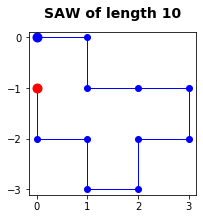

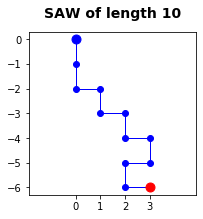

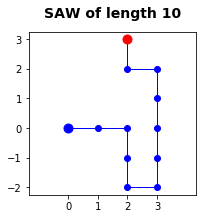

(None, None, None)

In [57]:
plot_rosenbluth_sampling_SAW(10, 1), plot_rosenbluth_sampling_SAW(10, 1), plot_rosenbluth_sampling_SAW(10, 1)

As was expected, the success rate seems higher at first glance. To build on this result, we will now construct the equivalent table to simple sampling in multi_rosenbluth_sampling_SAW: in it we will compare the the exact number of SAWs to our mean estimated number, its standard deviation and relative standard deviation, the relative error, the number of successful walks, their standard deviation and the proportion of success. As before, we have a total number of iteration (n_walks) over all integer values between the minimum length and maximum length walk (min_N, max_N) and a number of sub-samples per n (samples_per_N).

In [58]:
def multi_rosenbluth_sampling_SAW(min_N, max_N, n_walks, samples_per_N):
    
    total_results = []
    
    # we keep our results in a text file.
    f = open("RosenbluthSAW-MaxN"+str(max_N)+"Sampling"+str(samples_per_N)+"Walks"+str(n_walks)+".txt","w+")
    f.write('N\tExact\tMean_SAWs\tstd_err\t%_std_err\t%_Relative error\tMean_Completed\tstd_err\t%_success\n')
    for n in range(min_N, max_N+1):
        estimated_SAWs = []
        completed_paths = []
        for s in range(samples_per_N):
            result = rosenbluth_sampling_SAW(n,n_walks)
            estimated_SAWs.append(result[0])
            completed_paths.append(result[1])
        exact_num = float(exact[n])
        avg_estimated_SAWs = sum(estimated_SAWs)/len(estimated_SAWs) # estimated total number
        err_estimated_SAWs = stdev(estimated_SAWs)/np.sqrt(samples_per_N) # standard error
        per_err_estimateSAWs =  (err_estimated_SAWs / avg_estimated_SAWs ) * 100 # relative standard error
        avg_completed_paths = sum(completed_paths)/len(completed_paths) # total completed walks
        err_completed_paths = stdev(completed_paths)/np.sqrt(samples_per_N) # and its standard error
        relative_error = ZeroDivEr(avg_estimated_SAWs , exact[n]) # relative error
        proportion_success = (avg_completed_paths / n_walks) * 100 # % success
        
        total_results.append([n,avg_estimated_SAWs,err_estimated_SAWs,avg_completed_paths,err_completed_paths, relative_error, proportion_success])
        f.write(str(n)+'\t'+str(exact_num)+'\t'+str(avg_estimated_SAWs)+'\t'+str(err_estimated_SAWs)+'\t'+str(per_err_estimateSAWs)+'\t'+str(relative_error)+'\t'+str(avg_completed_paths)+'\t'+str(err_completed_paths)+'\t'+str(proportion_success)+'\n')
    f.close()
    
    return total_results


In [70]:
# we time the run of our algorithm.
start = timeit.default_timer()
#multi_rosenbluth_sampling_SAW(1, 50, 10000, 10)
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  769.1910334140011


In [32]:
# we load our results from the text fil with pandas. 
multi_rosenbluth_SAW = pd.read_csv('RosenbluthSAW-MaxN50Sampling10Walks10000.txt', delimiter = "\t")

In [33]:
multi_rosenbluth_SAW

,N,Exact,Mean_SAWs,std_err,%_std_err,%_Relative error,Mean_Completed,std_err.1,%_success
0,1,4.000000e+00,4.000000e+00,0.000000e+00,0.000000,0.000000,10000.0,0.000000,100.000
1,2,1.200000e+01,1.200000e+01,0.000000e+00,0.000000,0.000000,10000.0,0.000000,100.000
2,3,3.600000e+01,3.600000e+01,0.000000e+00,0.000000,0.000000,10000.0,0.000000,100.000
3,4,1.000000e+02,9.991692e+01,6.657578e-02,0.066631,0.083080,10000.0,0.000000,100.000
4,5,2.840000e+02,2.839590e+02,1.551700e-01,0.054645,0.014437,10000.0,0.000000,100.000
5,6,7.800000e+02,7.808918e+02,8.127965e-01,0.104086,0.114338,10000.0,0.000000,100.000
6,7,2.172000e+03,2.163704e+03,2.426022e+00,0.112124,0.381934,9972.4,1.674648,99.724
7,8,5.916000e+03,5.915213e+03,6.462439e+00,0.109251,0.013304,9949.0,2.139574,99.490
8,9,1.626800e+04,1.621301e+04,3.222257e+01,0.198745,0.338034,9906.9,3.328163,99.069
9,10,4.410000e+04,4.386341e+04,8.751403e+01,0.199515,0.536496,9857.9,4.217556,98.579


We see that the first ten estimated total walks on the 2D lattice we obtain are very close to the exact values for a given $n$, with low standard error and low relative standard error. Values up to $n = 47$ have less than $1 \%$ relative standard error and values up to $n = 50$ have around $1.1 \%$. We therefore have very low sampling variance and high precision in our results up to high values of $n$. The relative error is also less than or around $1 \%$ in most of the range, indicating we obtained very accurate results up to high values.

In addition, the proportion of successful walks does not show the steep and rapid decline we saw in simple sampling: here we have values with above $90 \%$ of success rate for $n$ up to 20 and a slow decline up to $57 \%$ for $n = 50$.

All in all, the Rosenbluth method, with only two added constraints, is slightly more difficult to implement than the previous methods, but is highly accurate and precise up to high values of $n$. It can compute estimated values of $n$ which were inaccessible so far, with a relatively reasonable computing time of 12 minutes for 10000 iterations and 10 sub-samples.

# Comparison between the three methods.

We present a table with a comparison between the estimated total number of self-avoiding walks on a 2D lattice for $n$ up to a 100 for the two sampling methods we have implemented, as well as the exact results obtained from our recursive algorithm.

In [34]:
comparison_all_methods = pd.read_csv('Comparison_all_methods_100.txt', delimiter = "\t")

In [35]:
pd.set_option('display.max_rows', 100)
comparison_all_methods

,N,Exact,Recursive,Rosenbluth,SD,% Relative SD,Simple,SD.1,% Relative SD.1
0,1,4.000000e+00,4,4.000000e+00,0.000000e+00,0.0000,4.000000e+00,0.000000e+00,0.0000
1,2,1.200000e+01,12,1.200000e+01,0.000000e+00,0.0000,1.200144e+01,2.000455e-02,0.0120
2,3,3.600000e+01,36,3.600000e+01,0.000000e+00,0.0000,3.580224e+01,8.189027e-02,0.5493
3,4,1.000000e+02,100,9.990036e+01,3.427235e-02,0.0996,1.002061e+02,1.853148e-01,0.2061
4,5,2.840000e+02,284,2.840908e+02,7.895499e-02,0.0320,2.831053e+02,1.313051e+00,0.3150
5,6,7.800000e+02,780,7.783074e+02,5.136438e-01,0.2170,7.790592e+02,5.703434e+00,0.1206
6,7,2.172000e+03,2172,2.164463e+03,1.900335e+00,0.3470,2.178089e+03,2.071019e+01,0.2803
7,8,5.916000e+03,5916,5.893842e+03,7.659693e+00,0.3745,5.994578e+03,6.532485e+01,1.3282
8,9,1.626800e+04,16268,1.617516e+04,1.972343e+01,0.5707,1.677197e+04,1.047702e+02,3.0979
9,10,4.410000e+04,44100,4.386142e+04,7.368305e+01,0.5410,4.385145e+04,4.804670e+02,0.5636


As we have stated previously, the recursive method gives us exact values, but computation much above 20 is currently not feasible. Simple sampling gives reasonable estimates up to $n = 20$, but anything above that is very noisy and unreliable. Rosenbluth gives us good estimates up to $n= 100$ and above, with low variance and good accuracy. The only immediately identifiable drawback is increased computational time, as seen above. 

We will plot these results in \textbf{Figure 2} on a semilog scale to better visualize this, with the error bars for simple sampling (in green) and rosenbluth (in red).

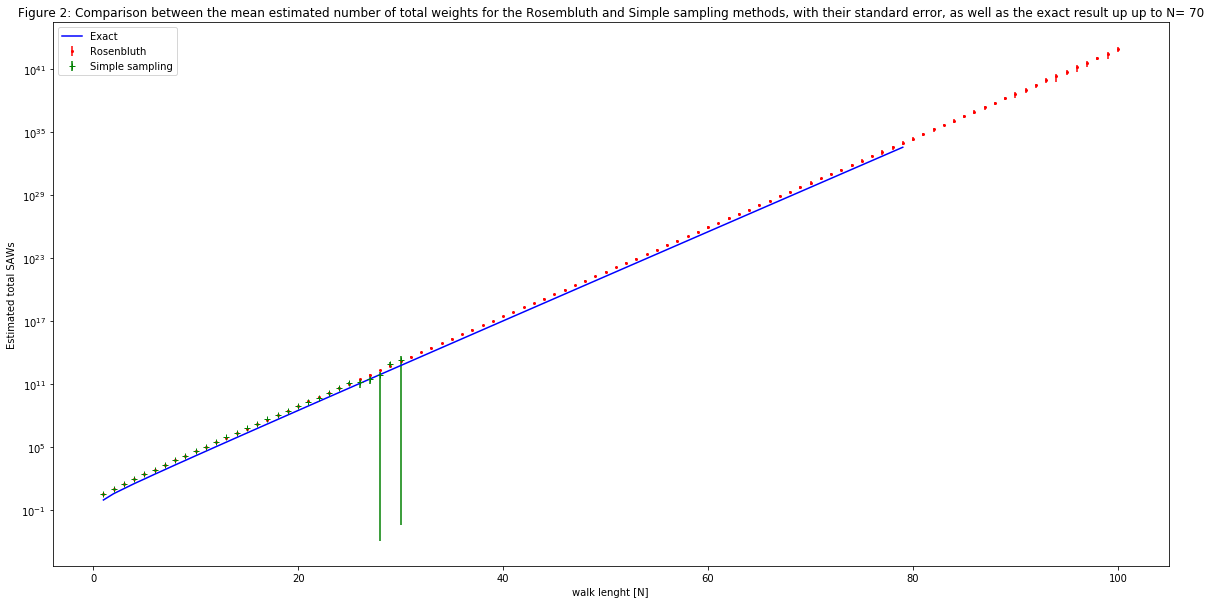

In [94]:
multi_rosenbluth_SAW_100 = pd.read_csv('RosenbluthSAW-MaxN100Sampling10Walks10000.txt', delimiter = "\t")
multi_simple_SAW_100 = pd.read_csv('SimpleSamplingSAW-MaxN100Sampling10Walks10000.txt', delimiter = "\t")

x1 = np.arange(1, 101)
x2 = np.arange(1, 31)
x3 = np.arange(1, 80)

EstimatedSAWs_Rosenbluth = multi_rosenbluth_SAW_100[['Mean_SAWs']].to_numpy()
Error_rosenbluth = multi_rosenbluth_SAW_100[['std_err']].to_numpy()
EstimatedSAWs_Simple = multi_simple_SAW_100[['Mean_SAWs']].to_numpy()
Error_simple =  multi_simple_SAW_100[['std_err']].to_numpy()
Exact_SAWs = exact[0:79]

plt.figure(figsize=(20,10))
plt.errorbar(x1, EstimatedSAWs_Rosenbluth[0:100], yerr=10*Error_rosenbluth[0:100], fmt='o',markersize=2, color="red", label="Rosenbluth")
plt.errorbar(x2, EstimatedSAWs_Simple[0:30],fmt='+', yerr= Error_simple[0:30], color="green", label="Simple sampling")
plt.semilogy(x3, Exact_SAWs,color= "blue", label= 'Exact')


plt.xlabel("walk lenght [N]")
plt.ylabel("Estimated total SAWs")
plt.title(r'Figure 2: Comparison between the mean estimated number of total weights for the Rosembluth and Simple sampling methods, with their standard error, as well as the exact result up up to N= 70')
plt.legend()

plt.show()


In \textbf{Figure 2} we can immediately see that the estimated values for the Rosenbluth sampling method are well aligned with the exact values in blue. The standard error is low and because of this, the error bars are hard to distinguish on the log scale. The values for simple sampling stop at $n = 34$ and the standard error for those last values is very high, confirming that these values are not reliable.

Finally, we will also plot in \textbf{Figure 3} the proportion of successfully completed self-avoiding walks for both simple sampling and Rosenbluth, for values of $n$ from 1 to 100. 

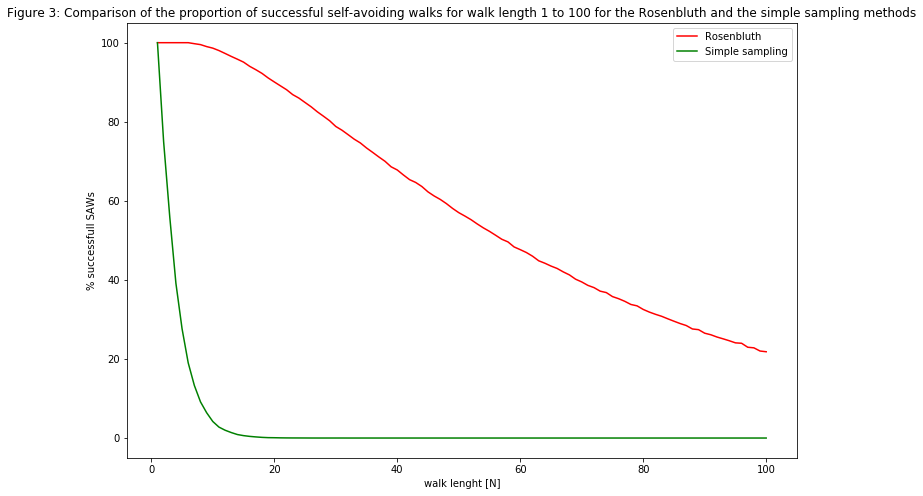

In [95]:
x = np.linspace(1, 100, 100)

multi_rosenbluth_SAW_100 = pd.read_csv('RosenbluthSAW-MaxN100Sampling10Walks10000.txt', delimiter = "\t")
multi_simple_SAW_100 = pd.read_csv('SimpleSamplingSAW-MaxN100Sampling10Walks10000.txt', delimiter = "\t")

#defining the functions 
prop_rosembluth = multi_rosenbluth_SAW_100[['%_success']].to_numpy()
prop_simple = multi_simple_SAW_100[['%_success']].to_numpy()
std_error_ros = multi_rosenbluth_SAW_100[['std_err.1']].to_numpy()
std_error_sim = multi_simple_SAW_100[['std_err']].to_numpy()

#plotting
plt.figure(figsize=(12,8))
plt.plot(x, prop_rosembluth,  color="red", label="Rosenbluth")
plt.plot(x, prop_simple, color="green", label="Simple sampling")

plt.xlabel("walk lenght [N]")
plt.ylabel("% successfull SAWs")
plt.title(r'Figure 3: Comparison of the proportion of successful self-avoiding walks for walk length 1 to 100 for the Rosenbluth and the simple sampling methods')
plt.legend()

plt.show()

We see that the shape of the curves is very different for both methods, with a very sharp decline for simple sampling for values over 10 and none after 34, whereas Rosenbluth slowly decreases and only reaches midway point for walks of $n \approx 60$.

# Conclusion

We successfully implemented the three algorithms that were specified and were able to explore their relative strengths and weaknesses. The following table synthesises our conclusions:

|                           |                    Recursive                   |              Simple Sampling              |                   Rosenbltuth                   |   |
|:-------------------------:|:----------------------------------------------:|:-----------------------------------------:|:-----------------------------------------------:|---|
|       Computing Time      | Diverges Exponentially Impractical for n > 20  |    OK up to n = 25, then noisy or long    |            Relatively fast up n = 100           |   |
| Implementation Complexity |           Simple recursive  algorithm          |             Simple random walk            |         More involved, but not unduly so        |   |
|          Coverage         |           Not practical beyond n > 20          |   Improves on recursive, but not greatly  | Can estimate with good precision beyond n = 100 |   |
| Precision                 |             Gives the exact result             | Very noisy beyond n = 25, with 100k paths |           Good esimates for 'large' n           |   |

# References

[1] B. Hayes, “How to avoid yourself,” American Scientist 86 314-319 (1998) (https://www.jstor.org/stable/27857052)

[2] T. Prellberg, “From Rosenbluth Sampling to PERM - rare event sampling with stochastic growth algorithms,” in R. Leidl and A. K. Hartmann (eds), Modern Computational Science 12: Lecture Notes from the 4th International Oldenburg Summer School, pages 311-334, BIS-Verlag der Carl von Ossietzky Universit¨at Oldenburg, 2012
(http://www.maths.qmul.ac.uk/˜tp/papers/pub084pre.pdf)

[3] W. Van den Dool, Thesis title: Counting Self-Avoiding Walks on the 2D Square Lattice, June 15, 2016.

[4] Number of n-step self-avoiding walks on square lattice, in The Online Encyclopedia of Integer Sequences (http://oeis.org/A001411)

[5] https://github.com/gabsens/SelfAvoidingWalk/blob/master/SAW.ipynb

[6] M. N. Rosenbluth and A. W. Rosenbluth, “Monte Carlo Calculation of the Average Extension of Molecular Chains,” Journal of Chemical Physics 23 356 (1955)
(https://doi.org/10.1063/1.1741967)
